In [1]:
import json
with open('lmg_pretrained_pipeline.json', 'r') as f:
    data = json.load(f)


at 0 - 29, 0: {'micro_auroc': 0.9067510366439819, 'mcc': 0.537497871891253}
at 0 - 30, 0: {'micro_auroc': 0.8749855160713196, 'mcc': 0.44153008905151747}
at 1 - 29, 0: {'micro_auroc': 0.9210611581802368, 'mcc': 0.5249092859399476}
at 1 - 30, 0: {'micro_auroc': 0.8387693166732788, 'mcc': 0.40257047659525746}
at 2 - 29, 0: {'micro_auroc': 0.8992815613746643, 'mcc': 0.42557717000729534}
at 2 - 30, 0: {'micro_auroc': 0.8641148209571838, 'mcc': 0.408962958097394}
at 3 - 29, 0: {'micro_auroc': 0.9207062125205994, 'mcc': 0.4773414361303895}
at 3 - 30, 0: {'micro_auroc': 0.862065315246582, 'mcc': 0.38999639363092764}
at 4 - 29, 0: {'micro_auroc': 0.9187623858451843, 'mcc': 0.5113649262636395}
at 4 - 30, 0: {'micro_auroc': 0.845522940158844, 'mcc': 0.3799721216180013}
at 5 - 29, 0: {'micro_auroc': 0.9152176380157471, 'mcc': 0.5082272930738762}
at 5 - 30, 0: {'micro_auroc': 0.8270803689956665, 'mcc': 0.3569983775606616}
Layer 29 micro_auroc: [0.9067510366439819, 0.9210611581802368, 0.89928156137

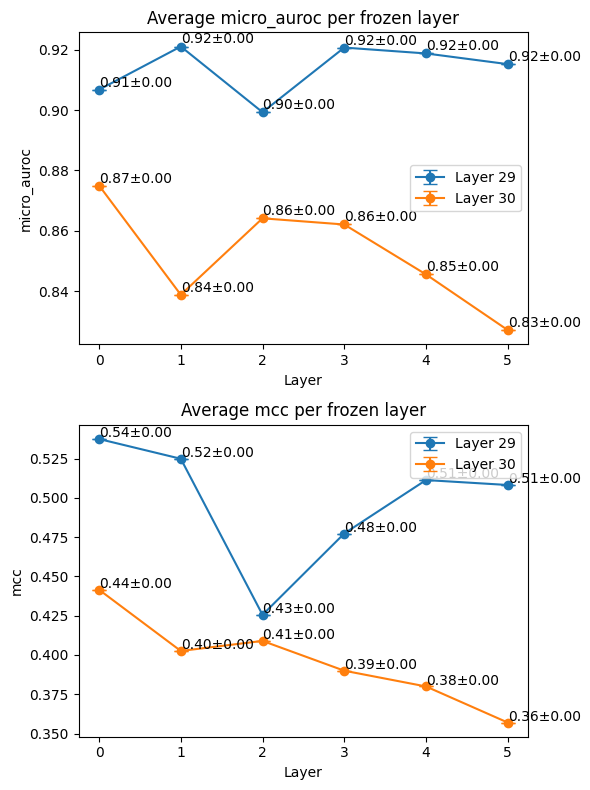

In [8]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

PRETRAINED_LAYERS = 6

# Plotting
fig, axs = plt.subplots(2, figsize=(6, 8))


layers = list(range(PRETRAINED_LAYERS))

avg_metrics = {29: {'micro_auroc': [], 'mcc': []},
               30: {'micro_auroc': [], 'mcc': []}}
std_metrics = {29: {'micro_auroc': [], 'mcc': []},
               30: {'micro_auroc': [], 'mcc': []}}

for gearnet_freeze_layer in range(PRETRAINED_LAYERS):
    layer_data_root = [d for d in data if d['gearnet_freeze_layer'] == gearnet_freeze_layer]
    for bert_freeze_layer in range(29, 31):
        metrics = {'micro_auroc': [], 'mcc': []}
        layer_data = [d for d in layer_data_root if d['bert_freeze_layer'] == bert_freeze_layer]
        for trial in np.unique([d['trial'] for d in layer_data]):
            trial_data = [d for d in layer_data if d['trial'] == trial]
            last_epoch_metric = trial_data[-1]['data']
            print(
                f'at {gearnet_freeze_layer} - {bert_freeze_layer}, {trial}: {last_epoch_metric}')

            metrics['micro_auroc'].append(last_epoch_metric['micro_auroc'])
            metrics['mcc'].append(last_epoch_metric['mcc'])

        avg_metrics[bert_freeze_layer]['micro_auroc'].append(
            np.mean(metrics['micro_auroc']))
        avg_metrics[bert_freeze_layer]['mcc'].append(np.mean(metrics['mcc']))
        std_metrics[bert_freeze_layer]['micro_auroc'].append(
            np.std(metrics['micro_auroc']))
        std_metrics[bert_freeze_layer]['mcc'].append(np.std(metrics['mcc']))

# micro_auroc plot
axs1 = axs[0]
for bert_freeze_layer in range(29, 31):
    axs1.errorbar(layers, avg_metrics[bert_freeze_layer]['micro_auroc'],
                  yerr=std_metrics[bert_freeze_layer]['micro_auroc'], fmt='-o', capsize=5, label=f"Layer {bert_freeze_layer}")
    print(f'Layer {bert_freeze_layer} micro_auroc: {avg_metrics[bert_freeze_layer]["micro_auroc"]}')
    for layer, avg, std in zip(layers, avg_metrics[bert_freeze_layer]['micro_auroc'], std_metrics[bert_freeze_layer]['micro_auroc']):
        axs1.text(layer, avg + 0.001, f'{avg:.2f}±{std:.2f}')
axs1.set_title('Average micro_auroc per frozen layer')
axs1.set_xlabel('Layer')
axs1.set_ylabel('micro_auroc')
axs1.legend()

# mcc plot
axs2 = axs[1]
for bert_freeze_layer in range(29, 31):
    axs2.errorbar(layers, avg_metrics[bert_freeze_layer]['mcc'],
                  yerr=std_metrics[bert_freeze_layer]['mcc'], fmt='-o', capsize=5, label=f"Layer {bert_freeze_layer}")
    
    for layer, avg, std in zip(layers, avg_metrics[bert_freeze_layer]['mcc'], std_metrics[bert_freeze_layer]['mcc']):
        axs2.text(layer, avg + 0.001, f'{avg:.2f}±{std:.2f}')
axs2.set_title('Average mcc per frozen layer')
axs2.set_xlabel('Layer')
axs2.set_ylabel('mcc')
axs2.legend()

plt.tight_layout()
plt.show()
